# <p style = 'text-align: center;'> Predicting rice productivity through machine learning algorithms</p>
### <p style= 'text-align: center;'> <font color = blue> Prepared by </font> </p>
### <p style = 'text-align: center;'><font color= green> **Mustafa Kamal Shahadat, Dr. Md. Khairul Alam, Arindom Biswas, Dr. Mohammad Mukhlesur Rahman**</font></p>
## <p style='text-align: center;'> <font color = orange> Group 5 </font> </p>

## Introduction

<p style='text-align: justify;'> Machine learning algorithms have been using for a number of years in different domains of agriculture sector (McQueen et al., 1995). Crop yield and productivity prediction is one of the challenging problems in precision agriculture, and many models have been proposed and validated so far. This problem requires the use of several datasets since crop yield depends on many different factors such as climate, weather, soil, use of fertilizer, and seed variety (Xu et al., 2019). This indicates that crop yield prediction is not a trivial task; instead, it consists of several complicated steps. Nowadays, crop yield prediction models can estimate the actual yield reasonably, but a better performance in yield prediction is still desirable (Filippi et al., 2019a).
Machine learning is an important decision support tool for crop yield prediction, including supporting decisions on what crops to grow, what to do during the growing season of the crops and total productivity. Several machine learning algorithms have been applied to support crop yield prediction research. The most widely applied algorithms are artificial neural network, linear regression, random forest regressor, support vector machine, and gradient boosting. Since crop yield is a function of numerous factors, however, the most popular factors are crop variety, management, temperature, rainfall, solar radiation, soil type, fertility status etc. Most of the scientists used temperature, rainfall, humidity, solar radiation, area of production and soil type for predicting crop productivity using machine learning (Klompenburg. 2020). In the present work our research question is to prediction of rice productivity from average yield, land area and environmental parameters using different regression, tree based algorithm and artificial neural network. </p>

#### Objective
- To predict rice productivity using machine learning algorithms.

## Methods

<p style='text-align: justify;'>In this study, machine learning approaches have been used to make prediction for rice productivity of four south-western coastal districts of Bangladesh, namely Khulna, Satkhira, Bagerhat and Narail. We collected historic rice production data (1995 to 2018) from Department of Agriculture Extension (DAE) and historical climatic data from Bangladesh Meteorological Department (BMD). Our target variable is rice production, which is a continuous variable. So, used different regression, tree based regressors and artifical neural network algorithms for predicting productivity. At the end these algorithms have been compared to achieve most accurate crop prediction  </p>
<br> The following steps explains about the analysis and relevant descriptions of the codes: 

#### Loading dataset

#### Source of data file: https://github.com/kamal-bari/machine_learning_with_python/blob/main/crop_production_weather_data.csv

In [1]:
# Import pandas library for importing data frame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data with pandas dataframe from github repository
df = pd.read_csv("https://raw.githubusercontent.com/kamal-bari/machine_learning_with_python/main/crop_production_weather_data.csv")

# Displaying first five rows of the dataframe
display(df.head())
display(df.tail())
# Looking data dimension
df.shape

,Year,District,crop,Production,Area_ha,Yield_t/ha,TP,RPI,SPI,DTR,Prod_category
0,1995-96,Bagerhat,aman,207455,110150,1.88,1.72,9.72,-0.11,5.88,H
1,1996-97,Bagerhat,aman,203787,110300,1.85,1.73,6.53,0.29,6.15,H
2,1997-98,Bagerhat,aman,198191,112890,1.76,1.75,0.20,0.32,5.80,L
3,1998-99,Bagerhat,aman,180681,103958,1.74,1.77,-1.79,0.90,5.40,M
4,1999-00,Bagerhat,aman,210729,107723,1.96,1.79,9.44,-0.47,6.08,H


,Year,District,crop,Production,Area_ha,Yield_t/ha,TP,RPI,SPI,DTR,Prod_category
259,2012-13,Satkhira,aus,9440,27102,2.87,2.60,10.30,0.24,9.48,H
260,2013-14,Satkhira,aus,10280,29810,2.90,2.62,10.49,-0.17,10.13,H
261,2014-15,Satkhira,aus,10170,29574,2.91,2.65,9.90,-0.13,9.55,H
262,2015-16,Satkhira,aus,5904,15934,2.70,2.67,1.17,-0.34,NaN,H
263,2016-17,Satkhira,aus,5475,15198,2.78,2.69,3.22,-0.16,NaN,M


(264, 11)

#### Feature description
<p> 1. Year = Cropping year. Crop was sown at the end of the previous year and harvested in the first quarter of the following year. Data collected from 1995-96 to 2016-17.</p>
<p> 2. District = Data collected for the selected districts of Bangladesh. There are 4 districts from South-western coasltal saline  region of Bangladesh.</p>
<p> 3. Crop = There are three types of rice grown in different seasons namely aus (April to July), aman (August to November) and boro (December to March)/p>
<p> 4. Production = Total rice production of the growing season.</p>
<p> 5. Area_ha = Total area in hectare covered under rice cultivation of the District.</p>
<p> 6. Yield_t/ha = Average rice yield of the growing season.</p>
<p> 7. TP = Techonological Productivity. Calculated from the linear relationship between average yield and year</p>
<p> 8. RPI = Rice productivity Index. Calculated from the formula (yield-TP)/TP*100.</p>
<p> 9. SPI = Standard Precipitation Index. Calculated from (Total Rainfall of the season- Mean Rainfall of the total observed years)/Standard Deviation</p>
<p> 10.DTR = Diurnal Temperature Range. Calculated from (Mean Temperature of the season- Mean Temperature of total observed years) /Standard Deviation</p>
<p> 11. Production category = H- High production, M- Medium production, L- Low production. Calculated from percentile basis.

## Results and Discussions

### Data preprocessing

In [3]:
# Spliting and display year column
df_Year = df['Year'].str.split("-", expand=True)

display(df_Year.head(5))

,0,1
0,1995,96
1,1996,97
2,1997,98
3,1998,99
4,1999,00


In [4]:
# Concatenating newly created column from splitted year column
df = pd.concat([df, df_Year], axis=1)

display(df.head(5))

,Year,District,crop,Production,Area_ha,Yield_t/ha,TP,RPI,SPI,DTR,Prod_category,0,1
0,1995-96,Bagerhat,aman,207455,110150,1.88,1.72,9.72,-0.11,5.88,H,1995,96
1,1996-97,Bagerhat,aman,203787,110300,1.85,1.73,6.53,0.29,6.15,H,1996,97
2,1997-98,Bagerhat,aman,198191,112890,1.76,1.75,0.20,0.32,5.80,L,1997,98
3,1998-99,Bagerhat,aman,180681,103958,1.74,1.77,-1.79,0.90,5.40,M,1998,99
4,1999-00,Bagerhat,aman,210729,107723,1.96,1.79,9.44,-0.47,6.08,H,1999,00


In [5]:
# Dropping Year column, since it is unnecessary now
df.drop('Year', axis=1, inplace=True)
display(df.head(5))

,District,crop,Production,Area_ha,Yield_t/ha,TP,RPI,SPI,DTR,Prod_category,0,1
0,Bagerhat,aman,207455,110150,1.88,1.72,9.72,-0.11,5.88,H,1995,96
1,Bagerhat,aman,203787,110300,1.85,1.73,6.53,0.29,6.15,H,1996,97
2,Bagerhat,aman,198191,112890,1.76,1.75,0.20,0.32,5.80,L,1997,98
3,Bagerhat,aman,180681,103958,1.74,1.77,-1.79,0.90,5.40,M,1998,99
4,Bagerhat,aman,210729,107723,1.96,1.79,9.44,-0.47,6.08,H,1999,00


In [6]:
# Renaming new columns
df = df.rename(columns={0: 'year',
                        1: 'year_2'})

display(df.head())

,District,crop,Production,Area_ha,Yield_t/ha,TP,RPI,SPI,DTR,Prod_category,year,year_2
0,Bagerhat,aman,207455,110150,1.88,1.72,9.72,-0.11,5.88,H,1995,96
1,Bagerhat,aman,203787,110300,1.85,1.73,6.53,0.29,6.15,H,1996,97
2,Bagerhat,aman,198191,112890,1.76,1.75,0.20,0.32,5.80,L,1997,98
3,Bagerhat,aman,180681,103958,1.74,1.77,-1.79,0.90,5.40,M,1998,99
4,Bagerhat,aman,210729,107723,1.96,1.79,9.44,-0.47,6.08,H,1999,00


In [7]:
# Dropping year_2 column, because we want only year column
df.drop('year_2', axis=1, inplace=True)
display(df.head(5))

,District,crop,Production,Area_ha,Yield_t/ha,TP,RPI,SPI,DTR,Prod_category,year
0,Bagerhat,aman,207455,110150,1.88,1.72,9.72,-0.11,5.88,H,1995
1,Bagerhat,aman,203787,110300,1.85,1.73,6.53,0.29,6.15,H,1996
2,Bagerhat,aman,198191,112890,1.76,1.75,0.20,0.32,5.80,L,1997
3,Bagerhat,aman,180681,103958,1.74,1.77,-1.79,0.90,5.40,M,1998
4,Bagerhat,aman,210729,107723,1.96,1.79,9.44,-0.47,6.08,H,1999


#### Re-arranging column sequence 

In [8]:
print(df.columns)

Index(['District', 'crop', 'Production', 'Area_ha', 'Yield_t/ha', 'TP', 'RPI',
       'SPI', 'DTR', 'Prod_category', 'year'],
      dtype='object')


In [9]:
new_col_sequence = ['year','District', 'crop', 'Production', 'Area_ha', 'Yield_t/ha', 'TP', 'RPI','SPI', 'DTR', 'Prod_category']

In [10]:
df = df[new_col_sequence]

display(df.head(5))

,year,District,crop,Production,Area_ha,Yield_t/ha,TP,RPI,SPI,DTR,Prod_category
0,1995,Bagerhat,aman,207455,110150,1.88,1.72,9.72,-0.11,5.88,H
1,1996,Bagerhat,aman,203787,110300,1.85,1.73,6.53,0.29,6.15,H
2,1997,Bagerhat,aman,198191,112890,1.76,1.75,0.20,0.32,5.80,L
3,1998,Bagerhat,aman,180681,103958,1.74,1.77,-1.79,0.90,5.40,M
4,1999,Bagerhat,aman,210729,107723,1.96,1.79,9.44,-0.47,6.08,H


In [11]:
# Checking data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           264 non-null    object 
 1   District       264 non-null    object 
 2   crop           264 non-null    object 
 3   Production     264 non-null    int64  
 4   Area_ha        264 non-null    int64  
 5   Yield_t/ha     264 non-null    float64
 6   TP             264 non-null    float64
 7   RPI            264 non-null    float64
 8   SPI            262 non-null    float64
 9   DTR            255 non-null    float64
 10  Prod_category  264 non-null    object 
dtypes: float64(5), int64(2), object(4)
memory usage: 22.8+ KB
None


**From the above data information, we can see that there are 10 columns, where 4 columns are object type or categorical data and column SPI and DTR have missing values.**

In [12]:
# Checking number of missing values
df.isnull().sum()

year             0
District         0
crop             0
Production       0
Area_ha          0
Yield_t/ha       0
TP               0
RPI              0
SPI              2
DTR              9
Prod_category    0
dtype: int64

**SPI and DTR features have 2 and 9 missing values, respectively.**

In [13]:
# Replacing missing values with median
df['SPI'].fillna(df['SPI'].median(), inplace = True)
df['DTR'].fillna(df['DTR'].median(), inplace = True)
print(df.isnull().sum())

year             0
District         0
crop             0
Production       0
Area_ha          0
Yield_t/ha       0
TP               0
RPI              0
SPI              0
DTR              0
Prod_category    0
dtype: int64


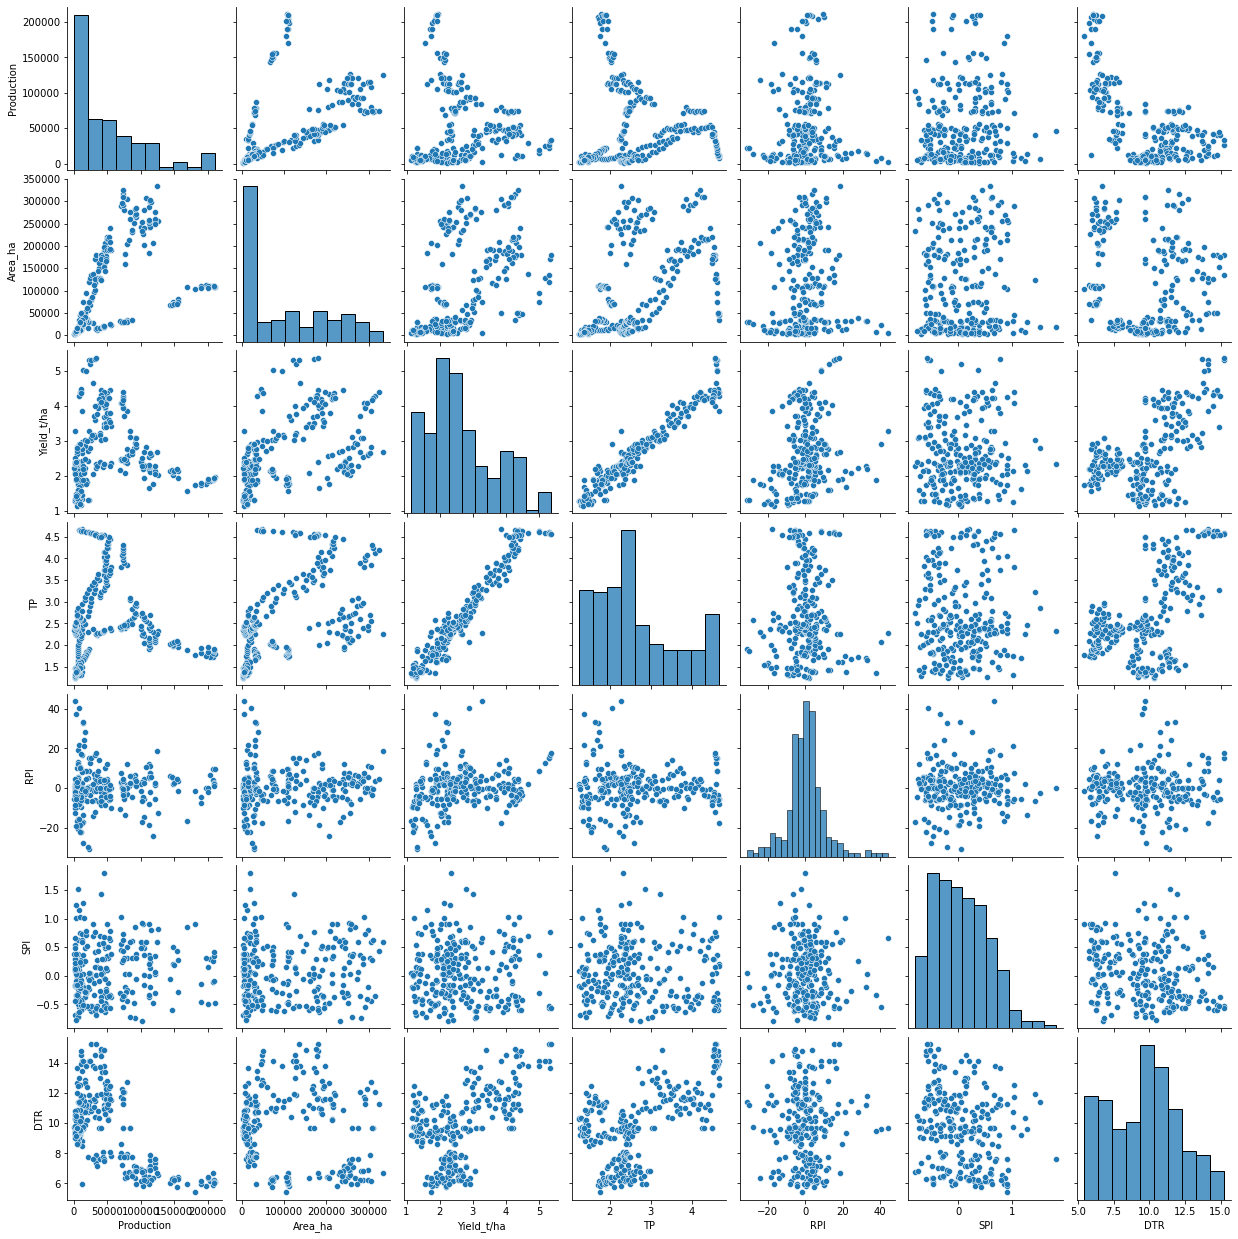

In [14]:
# Visualizing pair plots for checking linear relationships 
sns.pairplot(df,vars=['Production', 'Area_ha', 'Yield_t/ha', 'TP', 'RPI','SPI', 'DTR'])
plt.show()

<AxesSubplot:>

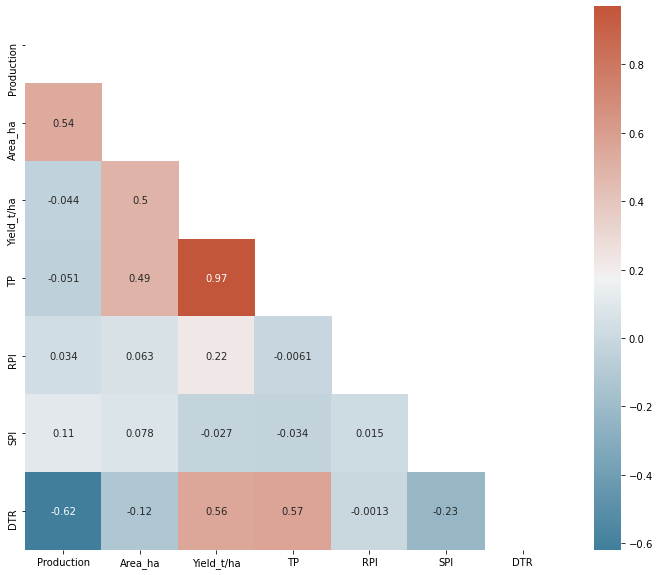

In [15]:
# Correlation between different variables
corr = df.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [16]:
# Displaying correlation matrix in the table format
df_cor = df.corr()

display(df_cor)

,Production,Area_ha,Yield_t/ha,TP,RPI,SPI,DTR
Production,1.000000,0.541043,-0.043595,-0.051374,0.034428,0.110372,-0.619174
Area_ha,0.541043,1.000000,0.495048,0.491860,0.063037,0.077784,-0.117969
Yield_t/ha,-0.043595,0.495048,1.000000,0.969513,0.222466,-0.026994,0.555198
TP,-0.051374,0.491860,0.969513,1.000000,-0.006108,-0.033686,0.566824
RPI,0.034428,0.063037,0.222466,-0.006108,1.000000,0.015174,-0.001305
SPI,0.110372,0.077784,-0.026994,-0.033686,0.015174,1.000000,-0.226842
DTR,-0.619174,-0.117969,0.555198,0.566824,-0.001305,-0.226842,1.000000


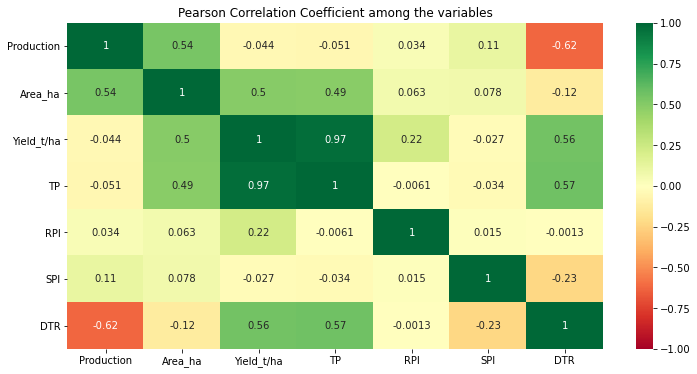

In [17]:
# Showing correlation matrix and heat-map in a different way
plt.figure(figsize=(12,6))
sns.heatmap(df_cor, annot=True, cmap="RdYlGn", vmax=1, vmin=-1)
plt.title("Pearson Correlation Coefficient among the variables")
plt.show()

#### Observations
- Production is posively correlated with Area_ha but negatively correlated with DTR
- Yield_t/ha is positively correlated with Area_ha and DTR

#### Checking multicolinearity

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
var = df[['Production', 'Area_ha', 'Yield_t/ha', 'TP', 'RPI','SPI', 'DTR']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = var.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(var.values, i)
                          for i in range(len(var.columns))]
  
print(vif_data)

      feature          VIF
0  Production     2.551929
1     Area_ha     5.030815
2  Yield_t/ha  1025.699511
3          TP  1013.416638
4         RPI     7.662614
5         SPI     1.039202
6         DTR    15.847359


#### Here we can see that feature Yield_t/ha and TP are correlated because high VIF values, hence we will drop either of them. 

In [19]:
# Dropping TP
df = df.drop("TP",axis=1)
df.head()

,year,District,crop,Production,Area_ha,Yield_t/ha,RPI,SPI,DTR,Prod_category
0,1995,Bagerhat,aman,207455,110150,1.88,9.72,-0.11,5.88,H
1,1996,Bagerhat,aman,203787,110300,1.85,6.53,0.29,6.15,H
2,1997,Bagerhat,aman,198191,112890,1.76,0.20,0.32,5.80,L
3,1998,Bagerhat,aman,180681,103958,1.74,-1.79,0.90,5.40,M
4,1999,Bagerhat,aman,210729,107723,1.96,9.44,-0.47,6.08,H


In [20]:
# Conversion of data type
df['year'] = df['year'].astype('int') 

# Showing data type again
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           264 non-null    int32  
 1   District       264 non-null    object 
 2   crop           264 non-null    object 
 3   Production     264 non-null    int64  
 4   Area_ha        264 non-null    int64  
 5   Yield_t/ha     264 non-null    float64
 6   RPI            264 non-null    float64
 7   SPI            264 non-null    float64
 8   DTR            264 non-null    float64
 9   Prod_category  264 non-null    object 
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 19.7+ KB
None


In [21]:
# Summary of the dataframe
df.describe()

,year,Production,Area_ha,Yield_t/ha,RPI,SPI,DTR
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,2005.500000,51944.219697,105531.545455,2.652424,0.102803,0.060303,9.666364
std,6.356339,53068.368801,99851.000391,1.004927,10.220905,0.493401,2.434725
min,1995.000000,1250.000000,2005.000000,1.130000,-30.950000,-0.790000,5.400000
25%,2000.000000,9432.500000,15483.500000,1.930000,-5.430000,-0.350000,7.622500
50%,2005.500000,35033.500000,69667.500000,2.395000,-0.150000,0.030000,9.700000
75%,2011.000000,79128.000000,189848.500000,3.265000,4.512500,0.380000,11.312500
max,2016.000000,210729.000000,333980.000000,5.370000,43.920000,1.810000,15.250000


In [22]:
# New categorization of the 'production' based on the combined district production. 
# From the summary data, we categorize according to percentile   
df['prod_cat'] = pd.cut(df['Production'], 
                             bins=[0, 35000, 80000, 211000], 
                             labels=["Low", "Moderate","Optimum"])

display(df.sample(10))
display(df['prod_cat'].value_counts())

,year,District,crop,Production,Area_ha,Yield_t/ha,RPI,SPI,DTR,Prod_category,prod_cat
183,2002,Narail,aus,17500,38754,2.21,28.35,0.26,10.73,H,Low
50,2001,Bagerhat,aus,7445,11959,1.61,-5.65,1.16,9.20,L,Low
243,1996,Satkhira,aus,3200,7368,2.30,2.03,1.24,10.35,M,Low
176,1995,Narail,aus,22540,29555,1.31,-30.95,0.05,11.38,M,Low
168,2009,Narail,boro,31760,126971,4.00,-12.19,0.15,14.50,M,Low
144,2007,Narail,aman,70929,29085,2.44,2.55,0.56,8.03,H,Moderate
80,2009,Khulna,aman,76290,181425,2.38,-3.98,-0.20,6.70,L,Moderate
114,1999,Khulna,aus,10845,12725,1.17,-9.41,-0.19,10.38,H,Low
5,2000,Bagerhat,aman,190318,110473,1.72,-4.57,-0.46,5.93,M,Optimum
11,2006,Bagerhat,aman,210289,109130,1.93,0.80,0.41,6.03,H,Optimum


Low         132
Moderate     69
Optimum      63
Name: prod_cat, dtype: int64

In [23]:
# Dropping old prod_category column, since it is unnecessary now
df = df.drop("Prod_category",axis=1)
display(df.sample(10))

,year,District,crop,Production,Area_ha,Yield_t/ha,RPI,SPI,DTR,prod_cat
249,2002,Satkhira,aus,2240,5197,2.32,-2.78,0.48,9.30,Low
56,2007,Bagerhat,aus,7385,15640,2.12,5.29,-0.65,9.05,Low
237,2012,Satkhira,boro,72590,295588,4.07,-0.05,-0.40,12.28,Moderate
213,2010,Satkhira,aman,12265,33970,2.77,-0.71,0.63,5.93,Low
236,2011,Satkhira,boro,73985,291713,3.94,-1.84,0.73,11.25,Moderate
156,1997,Narail,boro,10328,45424,4.40,-5.43,1.03,12.55,Low
202,1999,Satkhira,aman,124900,333980,2.67,18.46,0.59,6.70,Optimum
171,2012,Narail,boro,40995,174979,4.27,-5.74,-0.38,14.95,Moderate
65,2016,Bagerhat,aus,5124,12392,2.42,-2.28,-0.03,8.64,Low
88,1995,Khulna,boro,5140,14458,2.81,4.47,-0.36,13.65,Low


In [24]:
# Conversion of data type
df['District'] = df['District'].astype('category') 

# Showing data type again
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        264 non-null    int32   
 1   District    264 non-null    category
 2   crop        264 non-null    object  
 3   Production  264 non-null    int64   
 4   Area_ha     264 non-null    int64   
 5   Yield_t/ha  264 non-null    float64 
 6   RPI         264 non-null    float64 
 7   SPI         264 non-null    float64 
 8   DTR         264 non-null    float64 
 9   prod_cat    264 non-null    category
dtypes: category(2), float64(4), int32(1), int64(2), object(1)
memory usage: 16.4+ KB
None


In [25]:
# Level encoding of categorical data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df['District'] = LE.fit_transform(df['District'])
df['crop'] = LE.fit_transform(df['crop'])
df['prod_cat'] = LE.fit_transform(df['prod_cat'])

display(df.sample(10))

,year,District,crop,Production,Area_ha,Yield_t/ha,RPI,SPI,DTR,prod_cat
192,2011,2,1,8170,10357,1.27,-15.61,-0.63,11.38,0
109,2016,1,2,52300,219967,4.21,-6.25,0.66,11.90,1
227,2002,3,2,49015,171378,3.50,-0.20,-0.26,12.03,1
218,2015,3,0,83595,260240,3.11,2.69,-0.72,9.70,2
260,2013,3,1,10280,29810,2.90,10.49,-0.17,10.13,0
173,2014,2,2,41730,175957,4.22,-6.55,0.29,13.40,1
97,2004,1,2,30440,112814,3.71,7.08,-0.34,11.58,0
222,1997,3,2,41050,123360,3.01,-6.63,1.43,11.95,1
242,1995,3,1,3496,8031,2.30,2.78,-0.16,10.13,0
100,2007,1,2,46345,190021,4.10,10.30,0.53,10.63,1


In [26]:
# # One-hot encoding of all categorical features
# df= pd.get_dummies(df, drop_first=True)

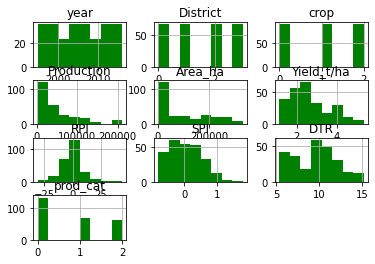

In [27]:
# Displaing histogram for checking data distribution
df.hist(bins=8,color='g')
plt.show()

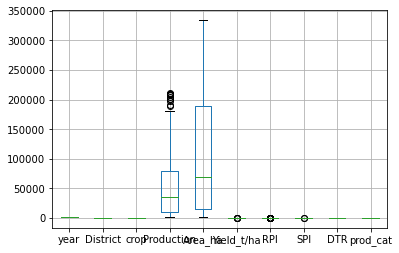

In [28]:
# Displaying box plot
df.boxplot()
plt.show()

The above box plot is not that much visible, so we are going to see it individually.

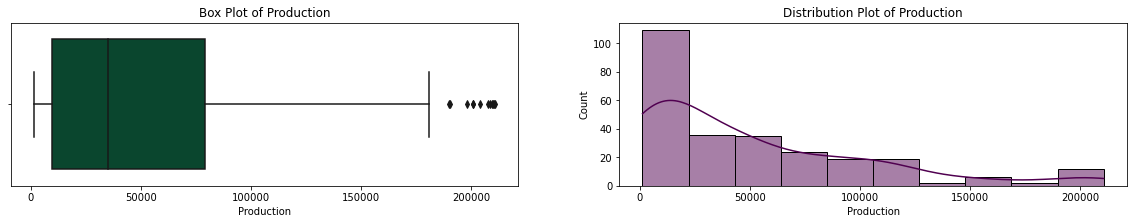

In [29]:
# Box plot and histogram of the 'production'
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(x=df['Production'],color='#005030')
plt.title(f'Box Plot of Production')

plt.subplot(1,2,2)
sns.histplot(x=df['Production'], color='#500050', kde=True)
plt.title(f'Distribution Plot of Production')
plt.show()

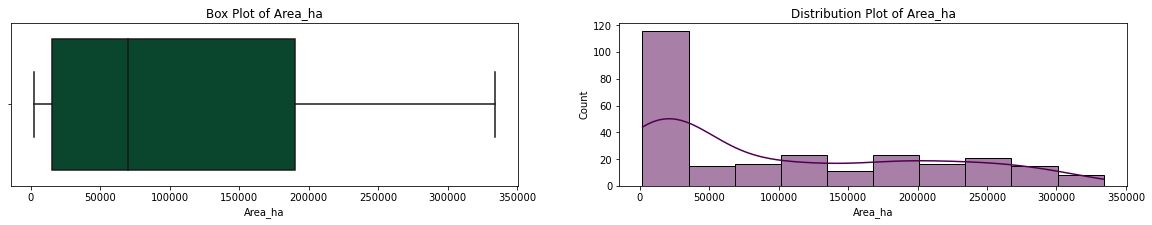

In [30]:
# Box plot and histogram of the 'Area_ha'
plt.figure(figsize=(20,3))
plt.subplot(1,2,1)
sns.boxplot(x=df['Area_ha'],color='#005030')
plt.title(f'Box Plot of Area_ha')

plt.subplot(1,2,2)
sns.histplot(x=df['Area_ha'], color='#500050', kde=True)
plt.title(f'Distribution Plot of Area_ha')
plt.show()

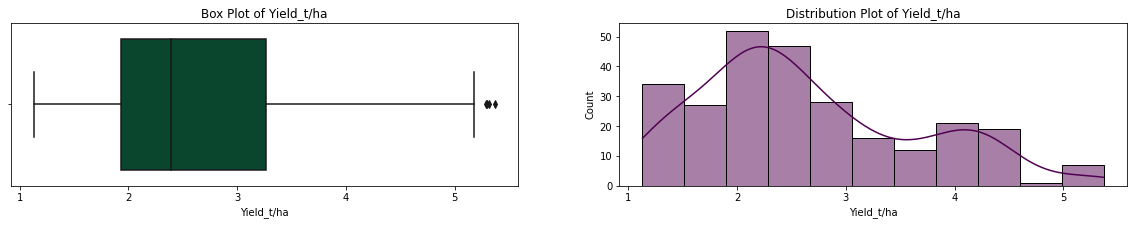

In [31]:
# Box plot and histogram of the 'Yield_t/ha'
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(x=df['Yield_t/ha'],color='#005030')
plt.title(f'Box Plot of Yield_t/ha')

plt.subplot(1,2,2)
sns.histplot(x=df['Yield_t/ha'], color='#500050', kde=True)
plt.title(f'Distribution Plot of Yield_t/ha')
plt.show()

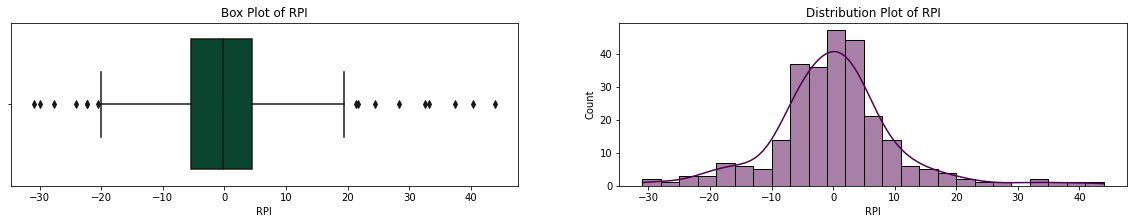

In [32]:
# Box plot and histogram of the 'RPI'
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(x=df['RPI'],color='#005030')
plt.title(f'Box Plot of RPI')

plt.subplot(1,2,2)
sns.histplot(x=df['RPI'], color='#500050', kde=True)
plt.title(f'Distribution Plot of RPI')
plt.show()

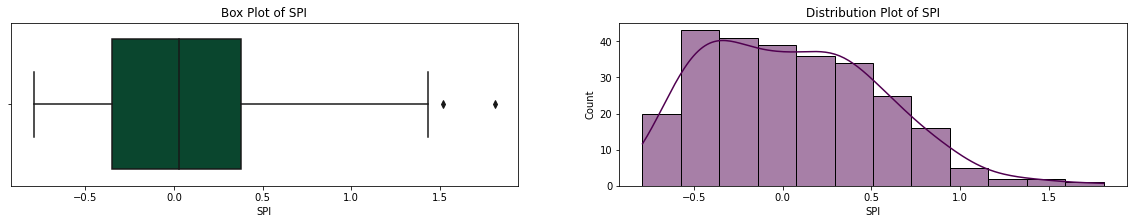

In [33]:
# Box plot and histogram of the 'SPI'
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(x=df['SPI'],color='#005030')
plt.title(f'Box Plot of SPI')

plt.subplot(1,2,2)
sns.histplot(x=df['SPI'], color='#500050', kde=True)
plt.title(f'Distribution Plot of SPI')
plt.show()

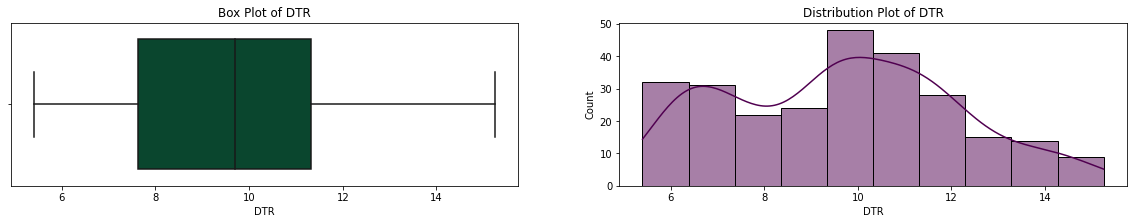

In [34]:
# Box plot and histogram of the 'DTR'
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(x=df['DTR'],color='#005030')
plt.title(f'Box Plot of DTR')

plt.subplot(1,2,2)
sns.histplot(x=df['DTR'], color='#500050', kde=True)
plt.title(f'Distribution Plot of DTR')
plt.show()

#### From the above boxplot and histograms we can see that there are some outliers in the features production, Yield_t/ha, RPI, SPI and most of them are not normally distributed.

In [35]:
# Checking column names after level encoding
display(df.columns)

Index(['year', 'District', 'crop', 'Production', 'Area_ha', 'Yield_t/ha',
       'RPI', 'SPI', 'DTR', 'prod_cat'],
      dtype='object')

In [36]:
# Checking data type once again
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        264 non-null    int32  
 1   District    264 non-null    int32  
 2   crop        264 non-null    int32  
 3   Production  264 non-null    int64  
 4   Area_ha     264 non-null    int64  
 5   Yield_t/ha  264 non-null    float64
 6   RPI         264 non-null    float64
 7   SPI         264 non-null    float64
 8   DTR         264 non-null    float64
 9   prod_cat    264 non-null    int32  
dtypes: float64(4), int32(4), int64(2)
memory usage: 16.6 KB


(264, 10)

- Now, there is no missing values and object type data

#### Separating the features and target variable

In [37]:
target = ['Production']

x = df.drop('Production', axis=1)
y = df[target]

print(x.shape, y.shape)

(264, 9) (264, 1)


#### Create train and test set

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(184, 9) (80, 9) (184, 1) (80, 1)


### <font color = blue> Model Implementation</font>

### Linear Regression without standardized data

In [39]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Training with Linear Regression

In [40]:
model = LinearRegression()
model = model.fit(x_train, y_train)

#### Linear Regression Coefficients and intercept

In [41]:
coefficients = pd.DataFrame({'features':x.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
2,crop,-8718.300182
1,District,-7299.740731
6,SPI,-5862.776443
7,DTR,-1022.518097
0,year,-1009.145973
5,RPI,-59.780163
3,Area_ha,-0.062800
4,Yield_t/ha,6644.740497
8,prod_cat,60130.765059


- A positive sign indicates that as the feature variable increases, the target variable also increases.
- A negative sign indicates that as the feature variable increases, the target variable decreases

In [42]:
model.intercept_

array([2050732.27812136])

#### Prediction

In [43]:
y_pred = model.predict(x_test)

#### Prediction Error

In [44]:
# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error = ", MAE)

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)

mean absolute error =  15488.943761633816
mean squared error =  431120181.7422239
root mean squared error =  20763.433765690683
coefficient of determination =  0.843248995349581


<ipython-input-45-54bea010f155>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['pred'] = y_pred
<ipython-input-45-54bea010f155>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()


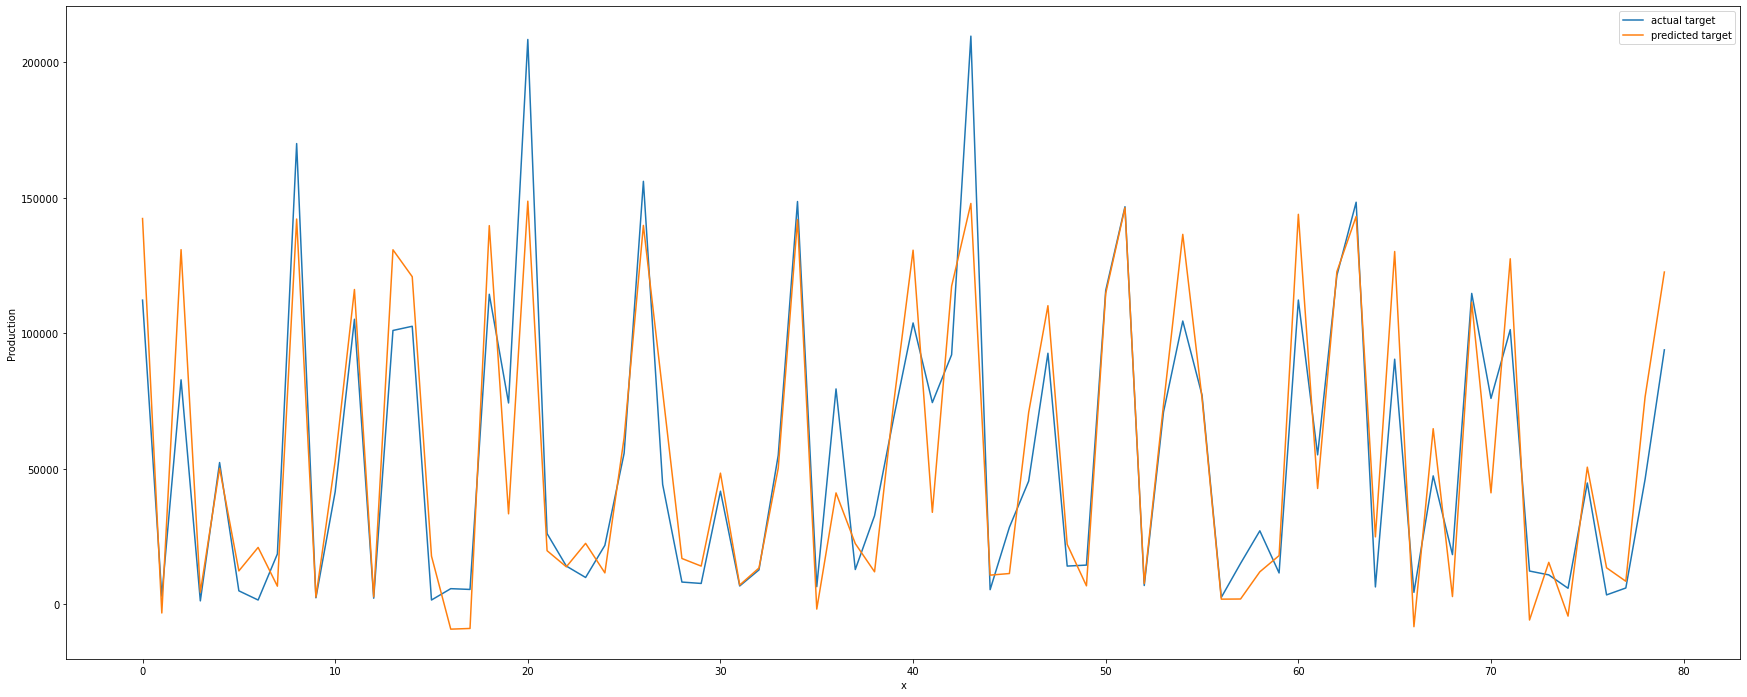

In [45]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='x', y='Production', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()

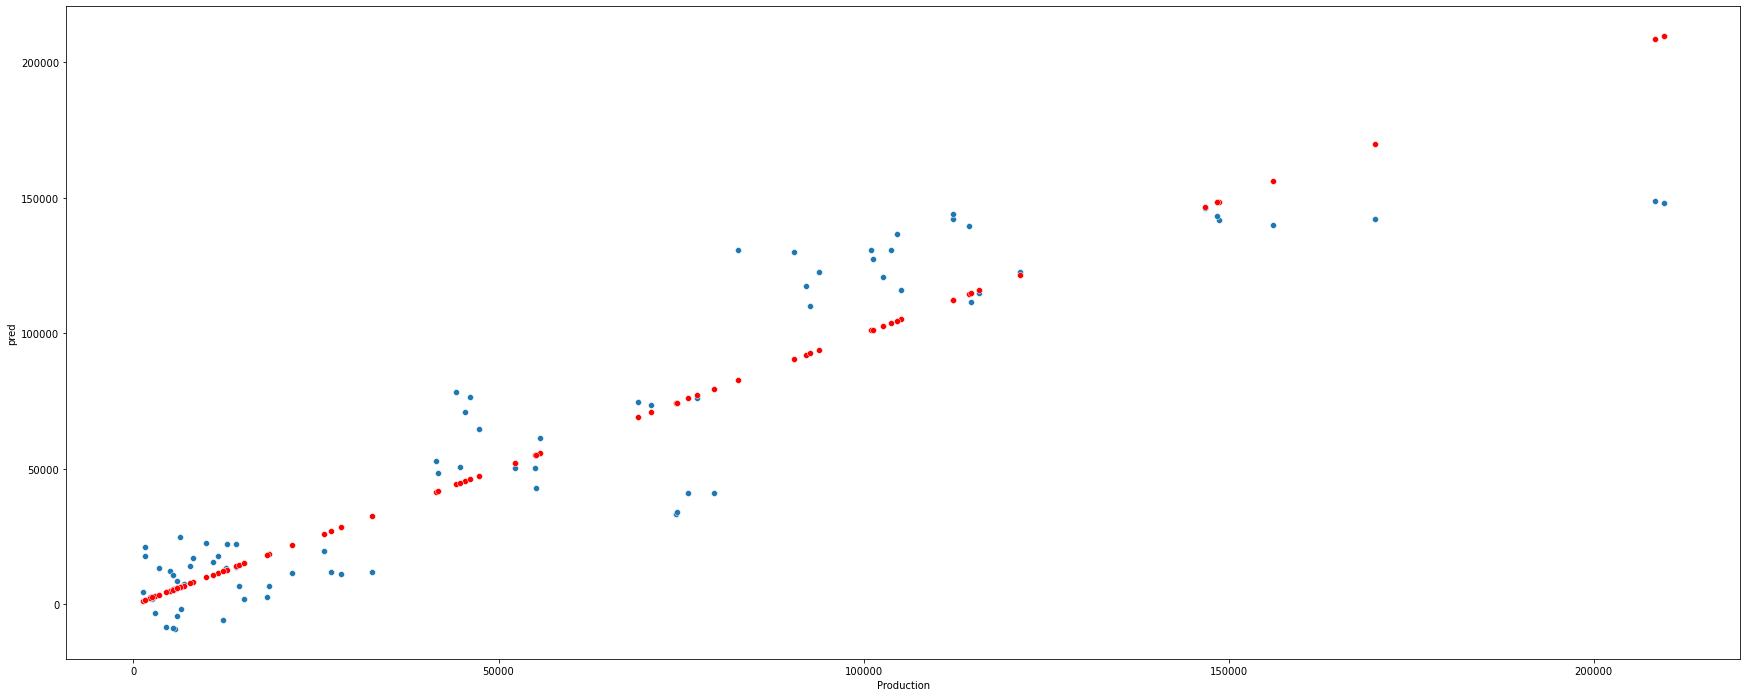

In [46]:
plt.figure(figsize=(30,12))

sns.scatterplot(x='Production', y='pred', data=y_test)

sns.scatterplot(x='Production', y='Production', data=y_test, color='red')
plt.show()

- From non-standardized data linear regression did not fit well. Though R2 value is higher (0.84) however MAE, MSE and RMSE are quite high. This is also evident from the graph. 

#### Standardization and spliting

In [47]:
# Standardize the features. Since data are not normally distribute.
x1 = df.drop(["Production"],axis=1)
y1 = df[["Production"]]

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x1 = std.fit_transform(x)
y1 = std.fit_transform(y)

#### Feature Selection

In [48]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)
print(df.shape, x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape )

(264, 10) (211, 9) (53, 9) (211, 1) (53, 1)


In [49]:
# Cross valiadation
from sklearn.model_selection import KFold
# seed = 40
# np.random.seed(seed)
# set_random_seed(seed)
kf = KFold(n_splits=4, shuffle=True, random_state=42)

### Linear Regression with standardized data

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

rgr = LinearRegression()
rgr = rgr.fit(x1_train, y1_train)

scores_lr = cross_val_score(rgr, x1_train, y1_train, cv=kf,scoring='neg_mean_squared_error')
print("MSE with all of the original data: %0.4f (+/- %0.4f)" % (scores_lr.mean(), scores_lr.std() * 2))

scores_lr = cross_val_score(rgr, x1_train, y1_train, cv=kf,scoring='r2')
print("R^2 of the model: %0.4f (+/- %0.4f)" % (scores_lr.mean(), scores_lr.std() * 2))

MSE with all of the original data: -0.1644 (+/- 0.0521)
R^2 of the model: 0.8249 (+/- 0.0614)


In [51]:
# The coefficients
print("Coefficients: \n", rgr.coef_)

Coefficients: 
 [[-0.11470838 -0.12096336 -0.07142822 -0.14333889  0.11197125 -0.01288655
  -0.04606317 -0.07408423  0.93688984]]


In [52]:
# Model intercept
rgr.intercept_

array([-0.00124146])

In [53]:
# Model predicted values
y_pred = pd.DataFrame(rgr.predict(x1_test))
display(y_pred.head(10))

,0
0,1.640438
1,-1.014957
2,1.410752
3,-0.836978
4,-0.032262
5,-0.731193
6,-0.591106
7,-0.839283
8,1.654024
9,-0.875727


In [54]:
# Renaming predicted column
y_pred = y_pred.rename(columns={0: 'Predicted'})

display(y_pred.head())

,Predicted
0,1.640438
1,-1.014957
2,1.410752
3,-0.836978
4,-0.032262


#### <font color= gree> Model Evaluation</font>

In [55]:
# mean absolute error
MAE_lr = mean_absolute_error(y1_test, y_pred)
print("mean absolute error = ", MAE_lr)

# mean squared error
MSE_lr = mean_squared_error(y1_test, y_pred)
print("mean squared error = ", MSE_lr)

# root mean squared error
RMSE_lr = mean_squared_error(y1_test, y_pred, squared=False)
print("root mean squared error = ", RMSE_lr)

# coefficient of determination
r_squared_lr = r2_score(y1_test, y_pred) 
print("coefficient of determination = ", r_squared_lr)

mean absolute error =  0.29860029735609933
mean squared error =  0.1637312612407966
root mean squared error =  0.40463719705533324
coefficient of determination =  0.8539368163892156


In [56]:
# prediction on Training data
training_data_prediction = rgr.predict(x1_train)

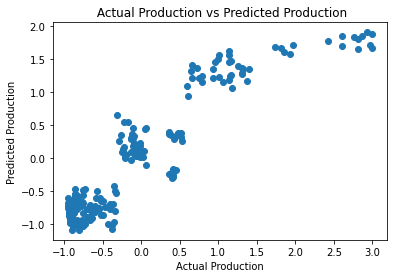

In [57]:
# Ploting actual and predicted values 
plt.scatter(y1_train, training_data_prediction)
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.title(" Actual Production vs Predicted Production")
plt.show()

- Linear regression has become improved after standardizing the data because MAE, MSE, RMSE are way much lower as well as R2 value also increased a bit (0.85).

# Decision Tree

In [58]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [59]:
dt = DecisionTreeRegressor(max_depth=3, random_state=1234)
dt = dt.fit(x1_train, y1_train)

#### <font color= gree> Model Evaluation</font>

In [60]:
# score = dt.score(x1_train, y1_train)
# print("R-squared:", score)

ypred = dt.predict(x1_test)

# MAE_DT = mean_absolute_error(y1_test, ypred)
# print("MAE = ", MAE_DT)
# MSE = mean_squared_error(y1_test, ypred)
# print("MSE: ", MSE)
# print("RMSE: ", MSE*(1/2.0))   

In [61]:
# mean absolute error
MAE_DT = mean_absolute_error(y1_test, ypred)
print("mean absolute error = ", MAE_DT)

# mean squared error
MSE_DT = mean_squared_error(y1_test, ypred)
print("mean squared error = ", MSE_DT)

# root mean squared error
RMSE_DT = mean_squared_error(y1_test, ypred, squared=False)
print("root mean squared error = ", RMSE_DT)

# coefficient of determination
r_squared_DT = r2_score(y1_test, ypred) 
print("coefficient of determination = ", r_squared_DT)

mean absolute error =  0.11548495325982497
mean squared error =  0.023323061369573485
root mean squared error =  0.15271889657004953
coefficient of determination =  0.9791937069966161


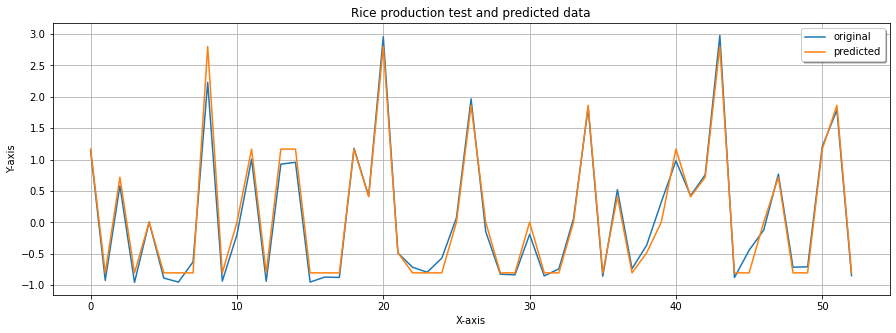

In [62]:
plt.figure(figsize = (15,5))
x_ax = range(len(y1_test))
plt.plot(x_ax, y1_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Rice production test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [63]:
# Visualize the tree
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_8 <= 0.93
|   |--- feature_8 <= -0.29
|   |   |--- feature_3 <= -0.52
|   |   |   |--- value: [-0.80]
|   |   |--- feature_3 >  -0.52
|   |   |   |--- value: [-0.48]
|   |--- feature_8 >  -0.29
|   |   |--- feature_3 <= 1.55
|   |   |   |--- value: [0.00]
|   |   |--- feature_3 >  1.55
|   |   |   |--- value: [0.41]
|--- feature_8 >  0.93
|   |--- feature_1 <= -0.89
|   |   |--- feature_3 <= -0.13
|   |   |   |--- value: [1.86]
|   |   |--- feature_3 >  -0.13
|   |   |   |--- value: [2.80]
|   |--- feature_1 >  -0.89
|   |   |--- feature_0 <= 0.63
|   |   |   |--- value: [1.17]
|   |   |--- feature_0 >  0.63
|   |   |   |--- value: [0.72]



In [64]:
# # Save to file
# with open("decistion_tree_reg.txt", "w") as fout:
#     fout.write(text_representation)

In [65]:
# %pip install dtreeviz

In [66]:
# from dtreeviz.trees import dtreeviz # remember to load the package
# import graphviz


In [67]:
# viz = dtreeviz(dt, x_train, y_train, 
#                title="Boston data set regression",
#                fontname="Arial",
#                title_fontsize=16,
#                colors = {"title":"purple"})

# viz

## Random Forest 

In [68]:
#Using all parameters
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x1_train,y1_train)

ypred_rf = rf.predict(x1_test)

mse = mean_squared_error(y1_test, ypred_rf)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

score = rf.score(x1_train, y1_train)
print("R-squared:", score)

MSE:  0.00733453700127073
RMSE:  0.003667268500635365
R-squared: 0.9979576573335899


<ipython-input-68-65027c290935>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train,y1_train)


In [69]:
# mean absolute error
MAE_RF = mean_absolute_error(y1_test, ypred_rf)
print("mean absolute error = ", MAE_RF)

# mean squared error
MSE_RF = mean_squared_error(y1_test, ypred_rf)
print("mean squared error = ", MSE_RF)

# root mean squared error
RMSE_RF = mean_squared_error(y1_test, ypred_rf, squared=False)
print("root mean squared error = ", RMSE_RF)

# coefficient of determination
r_squared_RF = r2_score(y1_test, ypred_rf) 
print("coefficient of determination = ", r_squared_RF)

mean absolute error =  0.05638457102219371
mean squared error =  0.00733453700127073
root mean squared error =  0.08564191147604501
coefficient of determination =  0.9934569255950386


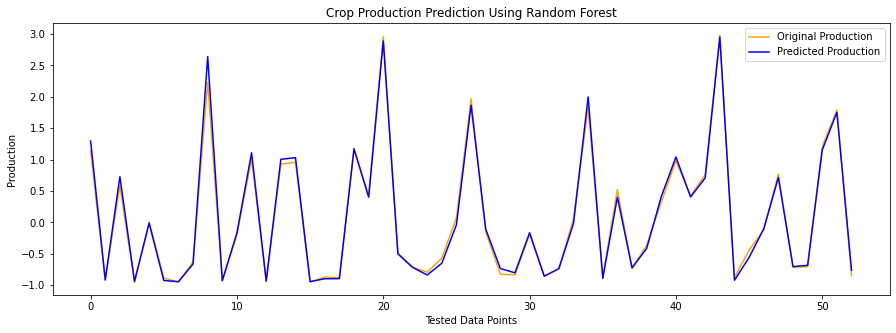

In [70]:
# Ploting actual and predicted values
plt.figure(figsize = (15,5))
plt.plot(y1_test, color='orange',label='Original Production')
plt.plot(ypred_rf, color='blue',label='Predicted Production')
plt.title('Crop Production Prediction Using Random Forest')
plt.xlabel("Tested Data Points")
plt.ylabel('Production')
plt.legend()
plt.show()

### Support Vector Machine - Regression (SVR)

In [71]:
# from sklearn.svm import SVR
# svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.01)
# svr_lin = SVR(gamma='auto',kernel='linear', C=1e3)
# svr_poly = SVR(gamma='auto',kernel='poly', C=1e3, degree=2)

# scores_rbf = cross_val_score(svr_rbf, x_train, y_train, cv=kf,scoring='neg_mean_squared_error')
# print("MSE of svr_rbf: %0.4f (+/- %0.4f)" % (-scores_rbf.mean(), scores_rbf.std() * 2))

# scores_lin = cross_val_score(svr_lin, x_train, y_train, cv=kf,scoring='neg_mean_squared_error')
# print("MSE of svr_lin: %0.4f (+/- %0.4f)" % (-scores_lin.mean(), scores_lin.std() * 2))

# scores_poly = cross_val_score(svr_poly, x_train, y_train, cv=kf,scoring='neg_mean_squared_error')
# print("MSE of svr_poly: %0.4f (+/- %0.4f)" % (-scores_poly.mean(), scores_poly.std() * 2))

In [72]:
from sklearn.svm import SVR
from sklearn import metrics

svr=SVR() #Default hyperparameters
svr.fit(x1_train,y1_train)
y_pred_sv=svr.predict(x1_test)

# # printing accuracy scores
# print('RMSE:%.3f' %np.sqrt(mean_squared_error(y1_test, y_pred_sv)))
# print('MAE: %.3f' %mean_absolute_error(y1_test, y_pred_sv))
# print('R2 score: %.2f' %r2_score(y1_test, y_pred_sv))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [73]:
## printing accuracy scores
# mean absolute error
MAE_SV = mean_absolute_error(y1_test, y_pred_sv)
print("mean absolute error = %.3f" % MAE_SV)

# mean squared error
MSE_SV = mean_squared_error(y1_test, y_pred_sv)
print("mean squared error = %.3f" % MSE_SV)

# root mean squared error
RMSE_SV = mean_squared_error(y1_test, y_pred_sv, squared=False)
print("root mean squared error = %.3f" % RMSE_SV)

# coefficient of determination
r_squared_SV = r2_score(y1_test, y_pred_sv) 
print("coefficient of determination = %.2f" % r_squared_SV)

mean absolute error = 0.145
mean squared error = 0.036
root mean squared error = 0.190
coefficient of determination = 0.97


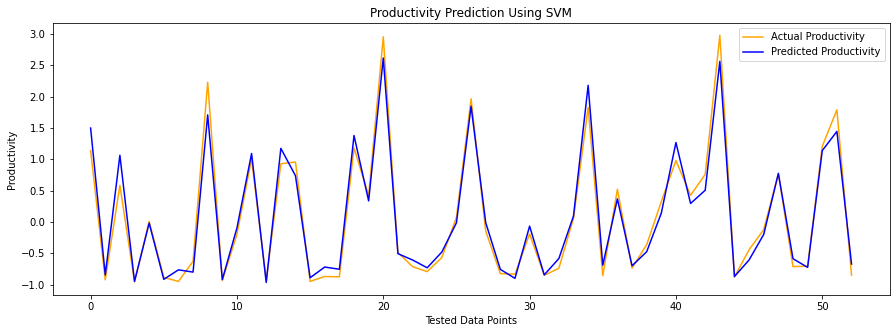

In [74]:
# Ploting actual and predicted values 
plt.figure(figsize = (15,5))
plt.plot(y1_test, color='orange',label='Actual Productivity')
plt.plot(y_pred_sv, color='blue',label='Predicted Productivity')
plt.title('Productivity Prediction Using SVM')
plt.xlabel("Tested Data Points")
plt.ylabel('Productivity')
plt.legend()
plt.show()

### LASSO REGRESSION

In [75]:
#using all parameters
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x1_train, y1_train) 
y_pred_LAR= model_lasso.predict(x1_test)

# # Printing accuracy scores
# print('RMSE = %.3f' %np.sqrt(mean_squared_error(y1_test,y_pred_LAR))) 
# print('MAE= %.3f' %mean_absolute_error(y1_test, y_pred_LAR))
# print('R2 score= %.2f' %r2_score(y1_test, y_pred_LAR))

In [76]:
## printing accuracy scores
# mean absolute error
MAE_LAR = mean_absolute_error(y1_test, y_pred_LAR)
print("mean absolute error = %.3f" % MAE_LAR)

# mean squared error
MSE_LAR = mean_squared_error(y1_test, y_pred_LAR)
print("mean squared error = %.3f" % MSE_LAR)

# root mean squared error
RMSE_LAR = mean_squared_error(y1_test, y_pred_LAR, squared=False)
print("root mean squared error = %.3f" % RMSE_LAR)

# coefficient of determination
r_squared_LAR = r2_score(y1_test, y_pred_LAR) 
print("coefficient of determination = %.2f" % r_squared_LAR)

mean absolute error = 0.291
mean squared error = 0.162
root mean squared error = 0.403
coefficient of determination = 0.86


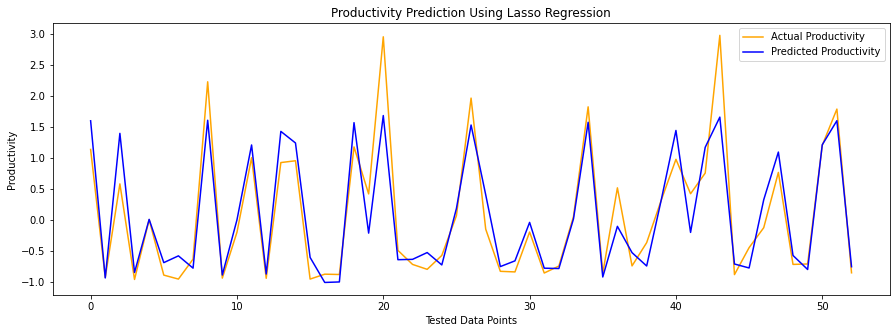

In [77]:
# Plotting actual and predicted values
plt.figure(figsize = (15,5))
plt.plot(y1_test, color='orange',label='Actual Productivity')
plt.plot(y_pred_LAR, color='blue',label='Predicted Productivity')
plt.title('Productivity Prediction Using Lasso Regression')
plt.xlabel("Tested Data Points")
plt.ylabel('Productivity')
plt.legend()
plt.show()

### Gradient Boosting Regressor

In [78]:
from sklearn import ensemble
gbr = ensemble.GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [79]:
# x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3) #80% for Training and 20% for Testing
# print(x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape)

In [80]:
gbr.fit(x1_train, y1_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(max_depth=5)

In [81]:
y_pred_gbr= gbr.predict(x1_test)

In [82]:
# mean absolute error
MAE_GBR = mean_absolute_error(y1_test, y_pred_gbr)
print("mean absolute error = %.3f" % MAE_GBR)

# mean squared error
MSE_GBR = mean_squared_error(y1_test, y_pred_gbr)
print("mean squared error = %.3f" % MSE_GBR)

# root mean squared error
RMSE_GBR = mean_squared_error(y1_test, y_pred_gbr, squared=False)
print("root mean squared error = %.3f" % RMSE_GBR)

# coefficient of determination
r_squared_GBR = r2_score(y1_test, y_pred_gbr) 
print("coefficient of determination = %.2f" % r_squared_GBR)

mean absolute error = 0.045
mean squared error = 0.005
root mean squared error = 0.072
coefficient of determination = 1.00


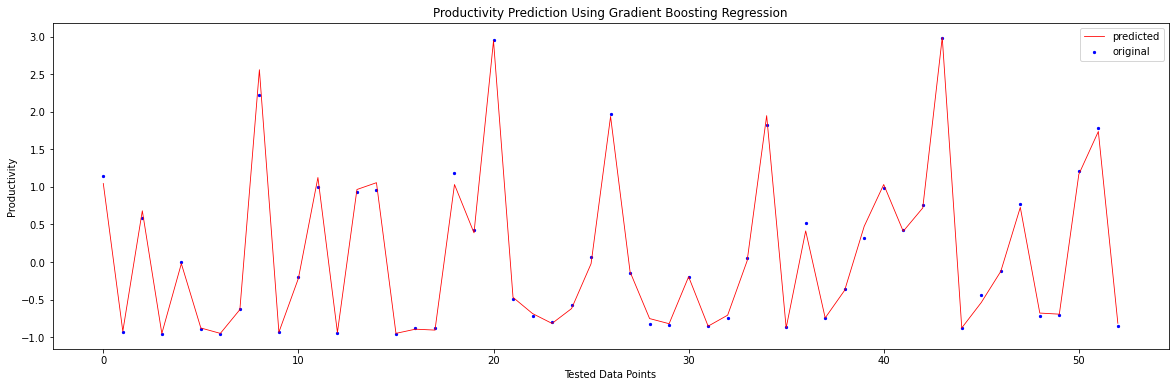

In [83]:
# Plotting actual and presicted values
x_ax = range(len(y1_test))
plt.figure(figsize=(20,6))
plt.scatter(x_ax, y1_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred_gbr, lw=0.8, color="red", label="predicted")
plt.title('Productivity Prediction Using Gradient Boosting Regression')
plt.xlabel("Tested Data Points")
plt.ylabel('Productivity')
plt.legend()
plt.show()

### Multi Layer Perceptron (MLP)

In [84]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(solver='lbfgs', hidden_layer_sizes=50, max_iter=1000, learning_rate='constant')

mlp.fit(x1_train, y1_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressor(hidden_layer_sizes=50, max_iter=1000, solver='lbfgs')

In [85]:
# print('Accuracy training : {:.3f}'.format(mlp.score(x1_train, y1_train)))
# print('Accuracy testing : {:.3f}'.format(mlp.score(x1_test, y1_test)))

In [86]:
#Prediction
y_pred_MLP = mlp.predict(x1_test)

# print('MAE= %.3f' %metrics.mean_absolute_error(y1_test,y_pred_MLP))
# print('MSE= %.3f' %metrics.mean_squared_error(y1_test,y_pred_MLP))
# print('R2 value= %.2f' %r2_score(y1_test, y_pred_MLP))

In [87]:
# mean absolute error
MAE_MLP = mean_absolute_error(y1_test, y_pred_MLP)
print("mean absolute error = %.3f" % MAE_MLP)

# mean squared error
MSE_MLP = mean_squared_error(y1_test, y_pred_MLP)
print("mean squared error = %.3f" % MSE_MLP)

# root mean squared error
RMSE_MLP = mean_squared_error(y1_test, y_pred_MLP, squared=False)
print("root mean squared error = %.3f" % RMSE_MLP)

# coefficient of determination
r_squared_MLP = r2_score(y1_test, y_pred_MLP) 
print("coefficient of determination = %.2f" % r_squared_MLP)

mean absolute error = 0.112
mean squared error = 0.026
root mean squared error = 0.161
coefficient of determination = 0.98


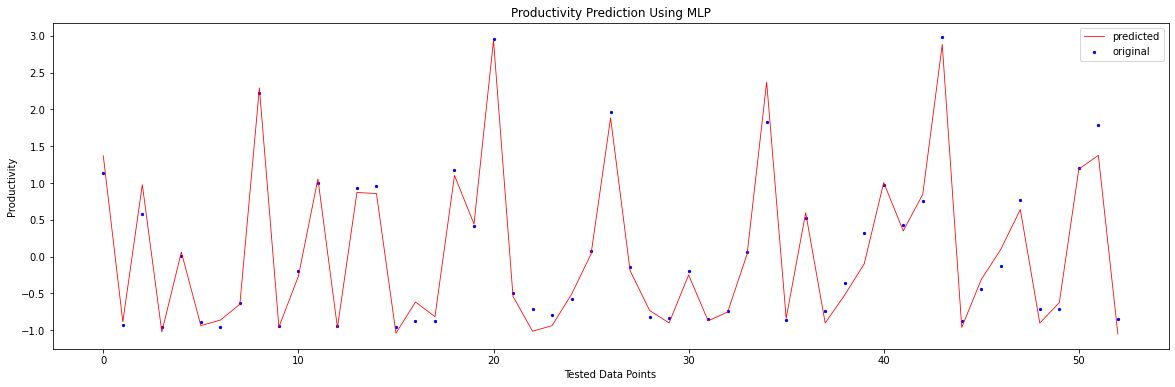

In [88]:
# Plotting actual and presicted values
x_ax = range(len(y1_test))
plt.figure(figsize=(20,6))
plt.scatter(x_ax, y1_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred_MLP, lw=0.8, color="red", label="predicted")
plt.title('Productivity Prediction Using MLP')
plt.xlabel("Tested Data Points")
plt.ylabel('Productivity')
plt.legend()
plt.show()

## Comparison of models
In this section, the results of best model of each section are compared. As we can see in the table below Gradient Boosting has the best prediction, since it has highest value of the co-efficient determination (R2= 0.995) and lowest values of accuracy scores viz. MAE (0.04), MSE (0.005), RMSE (0.07). So, therefore, it can be considered that gradient boosting is the most robust method for predicting rice productivity. 

In [89]:
# Comparison of the performance matrices of all tested model 
d = {'Method': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Lasso', 'GB' ,'MLP'], 
     'MAE': [MAE_lr, MAE_DT, MAE_RF, MAE_SV, MAE_LAR, MAE_GBR, MAE_MLP], 
     'MSE': [MSE_lr, MSE_DT, MSE_RF, MSE_SV, MSE_LAR, MSE_GBR, MSE_MLP], 
     'RMSE': [RMSE_lr, RMSE_DT, RMSE_RF, RMSE_SV, RMSE_LAR, RMSE_GBR, RMSE_MLP],
     'r-squared': [r_squared_lr, r_squared_DT, r_squared_RF, r_squared_SV, r_squared_LAR, r_squared_GBR, r_squared_MLP]
    }
df2 = pd.DataFrame(data=d)
df2

,Method,MAE,MSE,RMSE,r-squared
0,Linear Regression,0.298600,0.163731,0.404637,0.853937
1,Decision Tree,0.115485,0.023323,0.152719,0.979194
2,Random Forest,0.056385,0.007335,0.085642,0.993457
3,SVM,0.144618,0.036044,0.189852,0.967846
4,Lasso,0.291036,0.162191,0.402729,0.855311
5,GB,0.044654,0.005154,0.071789,0.995403
6,MLP,0.112395,0.026025,0.161322,0.976784


In [90]:
df2.describe()

,MAE,MSE,RMSE,r-squared
count,7.000000,7.000000,7.000000,7.000000
mean,0.151882,0.060543,0.209813,0.945990
std,0.103638,0.070777,0.138836,0.063139
min,0.044654,0.005154,0.071789,0.853937
25%,0.084390,0.015329,0.119180,0.911578
50%,0.115485,0.026025,0.161322,0.976784
75%,0.217827,0.099117,0.296290,0.986325
max,0.298600,0.163731,0.404637,0.995403


### Conclusion

<p style='text-align: justify;'> Gradient boosting regressor predicted rice productivity better than the other tested algorithms. However, the present dataset is not comprehensive, because it lacks other important features like soil fertility, salinity, pest and insect damage, pesticide application, area under irrigation etc. In spite of these, we have collected data from four districts only out of sixty four districts of Bangladesh. The model will be more robust and usefull if we could incorporate historic crop production  data along with yield determining features as much as possible from every districts of Bangladesh. We expect that the findings of the present study be handy for further study of predicting crop yield. </p>  

<p style='text-align: justify;'> From the present data set there is an opportunity to classify districts according to rice productivity status whether it is low, moderate or optimum productive districts. This information could be helpful to determine underlysing causes specially for low productive districts, so that necessary policy intervention could be implemented for increasing productivity. Beside, a robust model could be developed from similar datasets like collection of crop-cut data from individual farmers plot along with management information. This model could be helpful for predicting yield in the coming season or prior to harvest. </p>    

### References

> Filippi, P., Jones, E.J., Wimalathunge, N.S., Somarathna, P.D.S.N., Pozza, L.E., Ugbaje, S.U., Bishop, T.F.A., 2019a. An approach to forecast grain crop yield using multilayered, multi-farm data sets and machine learning. Precis. Agric. 1–15. https://doi.org/10.1007/s11119-018-09628-4.<br>

> Klompenburg, T. V., Kassahun, A., Catal, C., 2020. Crop yield prediction using machine learning: A systematic literature review. Computers and Electronics in Agriculture. 177. https://doi.org/10.1016/j.compag.2020.105709.<br>

> McQueen, R.J., Garner, S.R., Nevill-Manning, C.G., Witten, I.H., 1995. Applying machine learning to agricultural data. Comput. Electron. Agric. 12 (4), 275–293. https://doi.org/10.1016/0168-1699(95)98601-9. <br>

> Xu, X., Gao, P., Zhu, X., Guo, W., Ding, J., Li, C., Wu, X., 2019. Design of an integrated climatic assessment indicator (ICAI) for wheat production: a case study in Jiangsu Province, China. Ecol. Ind. 101, 943–953. https://doi.org/10.1016/j.ecolind.2019.01.059 
